## Obtem os dados analisados e tratados e treina o modelo fazendo a clusterização dos acidentes aeronáuticos.

In [452]:
# importa bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter('ignore')

In [453]:
# carrega arquivos em dataframes
df_acidentes_aero_trans = pd.read_csv('arquivos_tratados/df_acidentes_aero_trans.csv')

In [454]:
df_acidentes_aero_trans = df_acidentes_aero_trans.sort_index()

In [455]:
columns = [
        'ocorrencia_classificacao',
        'ocorrencia_saida_pista',
        'aeronave_tipo_veiculo',
        'aeronave_motor_tipo',
        'aeronave_motor_quantidade',
        'aeronave_tipo_operacao',
        'aeronave_nivel_dano',
        'periodo',     

        'ocorrencia_latitude',
        'ocorrencia_longitude', 

        ]

In [456]:
df_acidentes_aero = df_acidentes_aero_trans[columns]

In [457]:
df_acidentes_aero_trans.shape

(9357, 59)

In [458]:
df_acidentes_aero.head(5)

,ocorrencia_classificacao,ocorrencia_saida_pista,aeronave_tipo_veiculo,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_tipo_operacao,aeronave_nivel_dano,periodo,ocorrencia_latitude,ocorrencia_longitude
0,INCIDENTE,NÃO,AVIÃO,PISTÃO,BIMOTOR,PRIVADA,***,00:00 às 06:00,0.0,0.0
1,INCIDENTE,NÃO,AVIÃO,PISTÃO,MONOMOTOR,PRIVADA,NENHUM,18:00 às 00:00,0.0,0.0
2,INCIDENTE,NÃO,AVIÃO,JATO,BIMOTOR,***,***,18:00 às 00:00,0.0,0.0
3,INCIDENTE,NÃO,AVIÃO,PISTÃO,MONOMOTOR,INSTRUÇÃO,***,00:00 às 06:00,0.0,0.0
4,INCIDENTE,NÃO,AVIÃO,PISTÃO,BIMOTOR,TÁXI AÉREO,NENHUM,18:00 às 00:00,0.0,0.0


In [459]:
df_acidentes_aero_trans = df_acidentes_aero_trans.drop(columns=columns, axis=1)

In [460]:
df_acidentes_aero_trans.shape

(9357, 49)

In [461]:
df_acidentes_aero_trans.head(5)

,one-hot__ocorrencia_classificacao_ACIDENTE,one-hot__ocorrencia_classificacao_INCIDENTE,one-hot__ocorrencia_classificacao_INCIDENTE GRAVE,one-hot__ocorrencia_saida_pista_NÃO,one-hot__ocorrencia_saida_pista_SIM,one-hot__aeronave_tipo_veiculo_***,one-hot__aeronave_tipo_veiculo_ANFÍBIO,one-hot__aeronave_tipo_veiculo_AVIÃO,one-hot__aeronave_tipo_veiculo_BALÃO,one-hot__aeronave_tipo_veiculo_DIRIGÍVEL,one-hot__aeronave_tipo_veiculo_GIROCÓPTERO,one-hot__aeronave_tipo_veiculo_HELICÓPTERO,one-hot__aeronave_tipo_veiculo_HIDROAVIÃO,one-hot__aeronave_tipo_veiculo_PLANADOR,one-hot__aeronave_tipo_veiculo_TRIKE,one-hot__aeronave_tipo_veiculo_ULTRALEVE,one-hot__aeronave_motor_tipo_***,one-hot__aeronave_motor_tipo_JATO,one-hot__aeronave_motor_tipo_PISTÃO,one-hot__aeronave_motor_tipo_SEM TRAÇÃO,one-hot__aeronave_motor_tipo_TURBOEIXO,one-hot__aeronave_motor_tipo_TURBOÉLICE,one-hot__aeronave_motor_quantidade_***,one-hot__aeronave_motor_quantidade_BIMOTOR,one-hot__aeronave_motor_quantidade_MONOMOTOR,one-hot__aeronave_motor_quantidade_QUADRIMOTOR,one-hot__aeronave_motor_quantidade_SEM TRAÇÃO,one-hot__aeronave_motor_quantidade_TRIMOTOR,one-hot__aeronave_tipo_operacao_***,one-hot__aeronave_tipo_operacao_AGRÍCOLA,one-hot__aeronave_tipo_operacao_ESPECIALIZADA,one-hot__aeronave_tipo_operacao_EXPERIMENTAL,one-hot__aeronave_tipo_operacao_INSTRUÇÃO,one-hot__aeronave_tipo_operacao_NÃO REGULAR,one-hot__aeronave_tipo_operacao_POLICIAL,one-hot__aeronave_tipo_operacao_PRIVADA,one-hot__aeronave_tipo_operacao_REGULAR,one-hot__aeronave_tipo_operacao_TÁXI AÉREO,one-hot__aeronave_nivel_dano_***,one-hot__aeronave_nivel_dano_DESTRUÍDA,one-hot__aeronave_nivel_dano_LEVE,one-hot__aeronave_nivel_dano_NENHUM,one-hot__aeronave_nivel_dano_SUBSTANCIAL,one-hot__periodo_00:00 às 06:00,one-hot__periodo_06:00 às 12:00,one-hot__periodo_12:00 às 18:00,one-hot__periodo_18:00 às 00:00,minmax__ocorrencia_latitude,minmax__ocorrencia_longitude
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.528177,0.537901
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.528177,0.537901
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.528177,0.537901
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.528177,0.537901
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.528177,0.537901


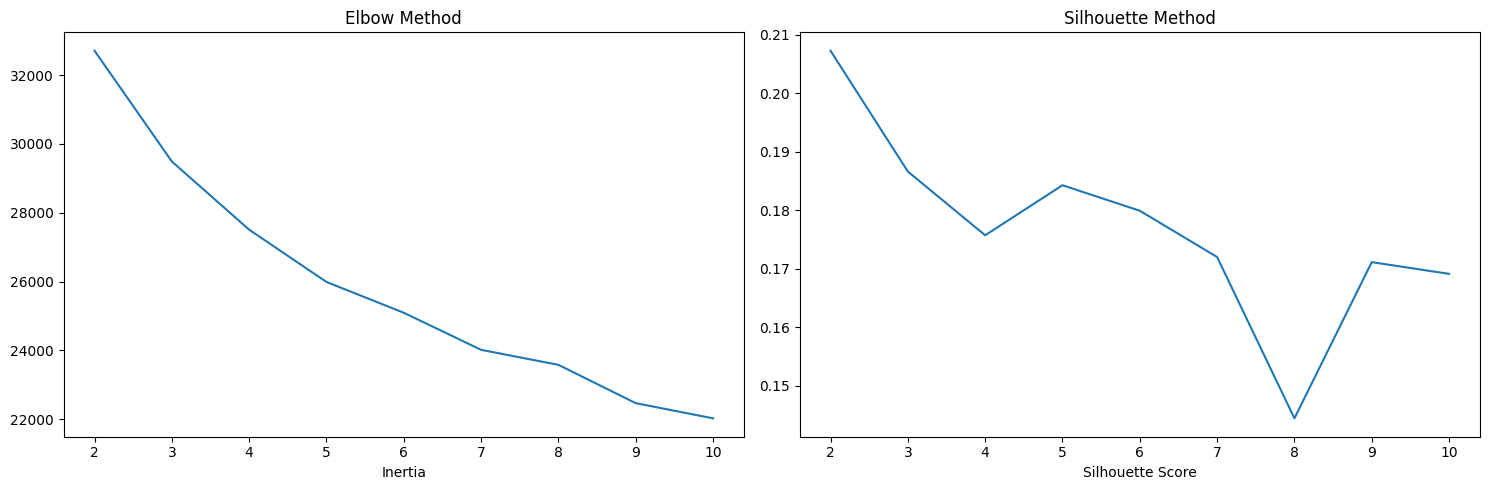

In [462]:
# gera os gráficos para definir a quantidade de clusters a serem gerados usando os métodos
# do COTOVELO e da SILHUETA - aqui definido que o melhor tamanho de cluster será de 3
from auxiliary_functions import plot_elbow_silhouette

plot_elbow_silhouette(df_acidentes_aero_trans)

In [463]:
RANDOM_STATE = 42

pipeline = Pipeline(
    [
        ("pca", PCA(n_components=2, random_state=RANDOM_STATE)),
        ("clustering", KMeans(n_clusters=3, random_state=RANDOM_STATE, n_init=10))
    ]
)

pipeline.fit(df_acidentes_aero_trans)

Pipeline(steps=[('pca', PCA(n_components=2, random_state=42)),
                ('clustering',
                 KMeans(n_clusters=3, n_init=10, random_state=42))])

In [464]:
pipeline.get_feature_names_out()

array(['kmeans0', 'kmeans1', 'kmeans2'], dtype=object)

In [465]:
pipeline.named_steps

{'pca': PCA(n_components=2, random_state=42),
 'clustering': KMeans(n_clusters=3, n_init=10, random_state=42)}

In [466]:
pipeline["clustering"].labels_

array([1, 1, 2, ..., 2, 0, 2])

In [467]:
df_clustered = df_acidentes_aero_trans.copy()
df_clustered["cluster"] = pipeline["clustering"].labels_

df_clustered.head()

,one-hot__ocorrencia_classificacao_ACIDENTE,one-hot__ocorrencia_classificacao_INCIDENTE,one-hot__ocorrencia_classificacao_INCIDENTE GRAVE,one-hot__ocorrencia_saida_pista_NÃO,one-hot__ocorrencia_saida_pista_SIM,one-hot__aeronave_tipo_veiculo_***,one-hot__aeronave_tipo_veiculo_ANFÍBIO,one-hot__aeronave_tipo_veiculo_AVIÃO,one-hot__aeronave_tipo_veiculo_BALÃO,one-hot__aeronave_tipo_veiculo_DIRIGÍVEL,one-hot__aeronave_tipo_veiculo_GIROCÓPTERO,one-hot__aeronave_tipo_veiculo_HELICÓPTERO,one-hot__aeronave_tipo_veiculo_HIDROAVIÃO,one-hot__aeronave_tipo_veiculo_PLANADOR,one-hot__aeronave_tipo_veiculo_TRIKE,one-hot__aeronave_tipo_veiculo_ULTRALEVE,one-hot__aeronave_motor_tipo_***,one-hot__aeronave_motor_tipo_JATO,one-hot__aeronave_motor_tipo_PISTÃO,one-hot__aeronave_motor_tipo_SEM TRAÇÃO,one-hot__aeronave_motor_tipo_TURBOEIXO,one-hot__aeronave_motor_tipo_TURBOÉLICE,one-hot__aeronave_motor_quantidade_***,one-hot__aeronave_motor_quantidade_BIMOTOR,one-hot__aeronave_motor_quantidade_MONOMOTOR,one-hot__aeronave_motor_quantidade_QUADRIMOTOR,one-hot__aeronave_motor_quantidade_SEM TRAÇÃO,one-hot__aeronave_motor_quantidade_TRIMOTOR,one-hot__aeronave_tipo_operacao_***,one-hot__aeronave_tipo_operacao_AGRÍCOLA,one-hot__aeronave_tipo_operacao_ESPECIALIZADA,one-hot__aeronave_tipo_operacao_EXPERIMENTAL,one-hot__aeronave_tipo_operacao_INSTRUÇÃO,one-hot__aeronave_tipo_operacao_NÃO REGULAR,one-hot__aeronave_tipo_operacao_POLICIAL,one-hot__aeronave_tipo_operacao_PRIVADA,one-hot__aeronave_tipo_operacao_REGULAR,one-hot__aeronave_tipo_operacao_TÁXI AÉREO,one-hot__aeronave_nivel_dano_***,one-hot__aeronave_nivel_dano_DESTRUÍDA,one-hot__aeronave_nivel_dano_LEVE,one-hot__aeronave_nivel_dano_NENHUM,one-hot__aeronave_nivel_dano_SUBSTANCIAL,one-hot__periodo_00:00 às 06:00,one-hot__periodo_06:00 às 12:00,one-hot__periodo_12:00 às 18:00,one-hot__periodo_18:00 às 00:00,minmax__ocorrencia_latitude,minmax__ocorrencia_longitude,cluster
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.528177,0.537901,1
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.528177,0.537901,1
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.528177,0.537901,2
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.528177,0.537901,1
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.528177,0.537901,2


In [468]:
df_clustered["cluster"].value_counts()

cluster
2    3830
1    2967
0    2560
Name: count, dtype: int64

In [469]:
df_acidentes_aero['cluster'] = df_clustered['cluster']

In [470]:
df_acidentes_aero.head(5)

,ocorrencia_classificacao,ocorrencia_saida_pista,aeronave_tipo_veiculo,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_tipo_operacao,aeronave_nivel_dano,periodo,ocorrencia_latitude,ocorrencia_longitude,cluster
0,INCIDENTE,NÃO,AVIÃO,PISTÃO,BIMOTOR,PRIVADA,***,00:00 às 06:00,0.0,0.0,1
1,INCIDENTE,NÃO,AVIÃO,PISTÃO,MONOMOTOR,PRIVADA,NENHUM,18:00 às 00:00,0.0,0.0,1
2,INCIDENTE,NÃO,AVIÃO,JATO,BIMOTOR,***,***,18:00 às 00:00,0.0,0.0,2
3,INCIDENTE,NÃO,AVIÃO,PISTÃO,MONOMOTOR,INSTRUÇÃO,***,00:00 às 06:00,0.0,0.0,1
4,INCIDENTE,NÃO,AVIÃO,PISTÃO,BIMOTOR,TÁXI AÉREO,NENHUM,18:00 às 00:00,0.0,0.0,2


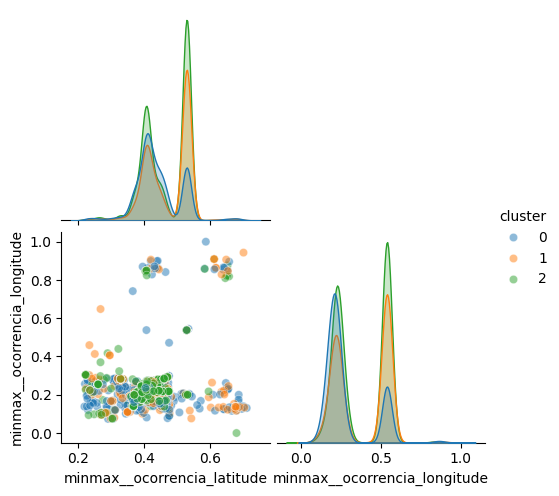

In [471]:
columns_analysis = ["minmax__ocorrencia_latitude", "minmax__ocorrencia_longitude"]

from auxiliary_functions import pairplot

pairplot(df_clustered, columns_analysis, hue_column="cluster")

In [472]:
list(df_acidentes_aero)

['ocorrencia_classificacao',
 'ocorrencia_saida_pista',
 'aeronave_tipo_veiculo',
 'aeronave_motor_tipo',
 'aeronave_motor_quantidade',
 'aeronave_tipo_operacao',
 'aeronave_nivel_dano',
 'periodo',
 'ocorrencia_latitude',
 'ocorrencia_longitude',
 'cluster']

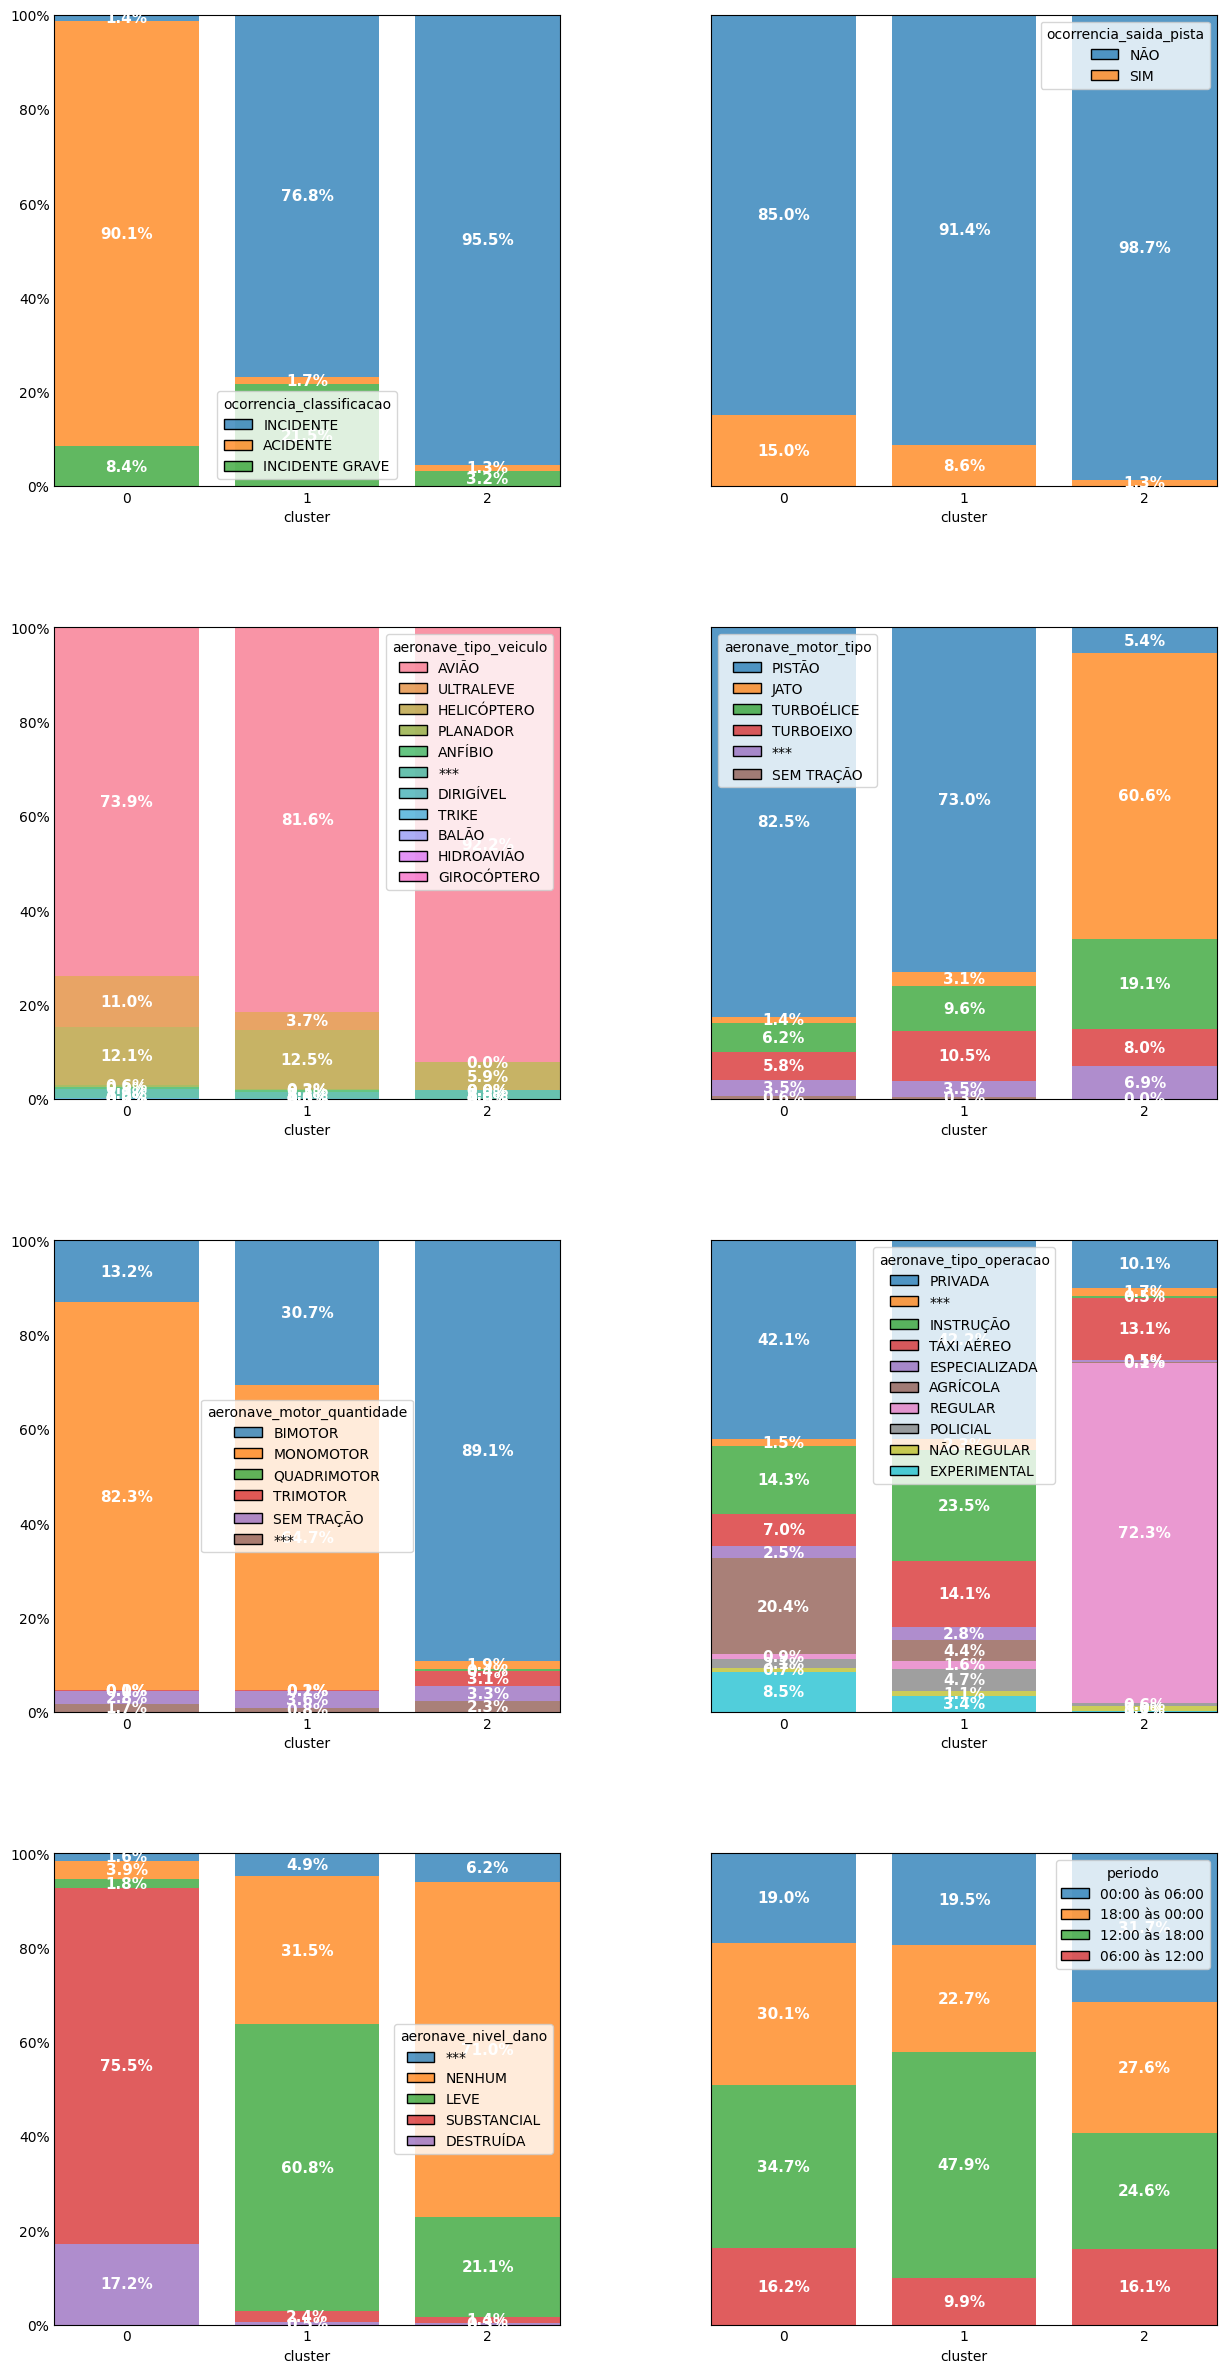

In [491]:
columns2 = [
 'ocorrencia_classificacao',
 'ocorrencia_saida_pista',
 'aeronave_tipo_veiculo',
 'aeronave_motor_tipo',
 'aeronave_motor_quantidade',
 'aeronave_tipo_operacao',
 'aeronave_nivel_dano',
 'periodo',  
]

from auxiliary_functions import plot_columns_percent_by_cluster

plot_columns_percent_by_cluster(
    dataframe=df_acidentes_aero,
    columns=columns2,
    rows_cols=(4, 2),
    figsize=(15, 30),
    column_cluster="cluster",    
)

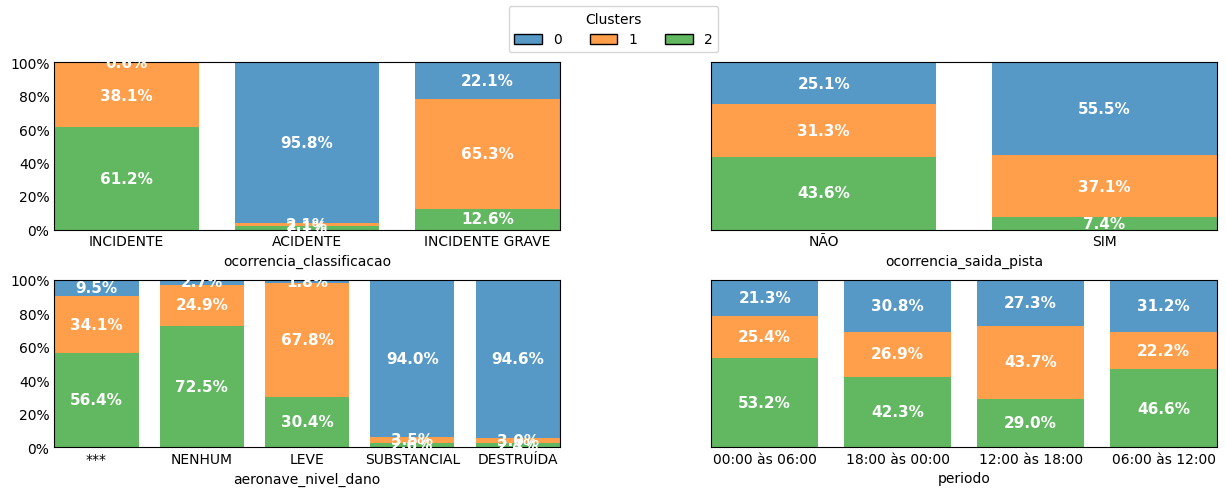

In [492]:
columns2 = [
 'ocorrencia_classificacao',
 'ocorrencia_saida_pista',
 'aeronave_nivel_dano',
 'periodo', 
]

from auxiliary_functions import plot_columns_percent_hue_cluster

plot_columns_percent_hue_cluster(
    dataframe=df_acidentes_aero,
    columns=columns2,
    rows_cols=(2, 2),
    figsize=(15, 5),
    column_cluster="cluster", 
    palette='tab10'
)

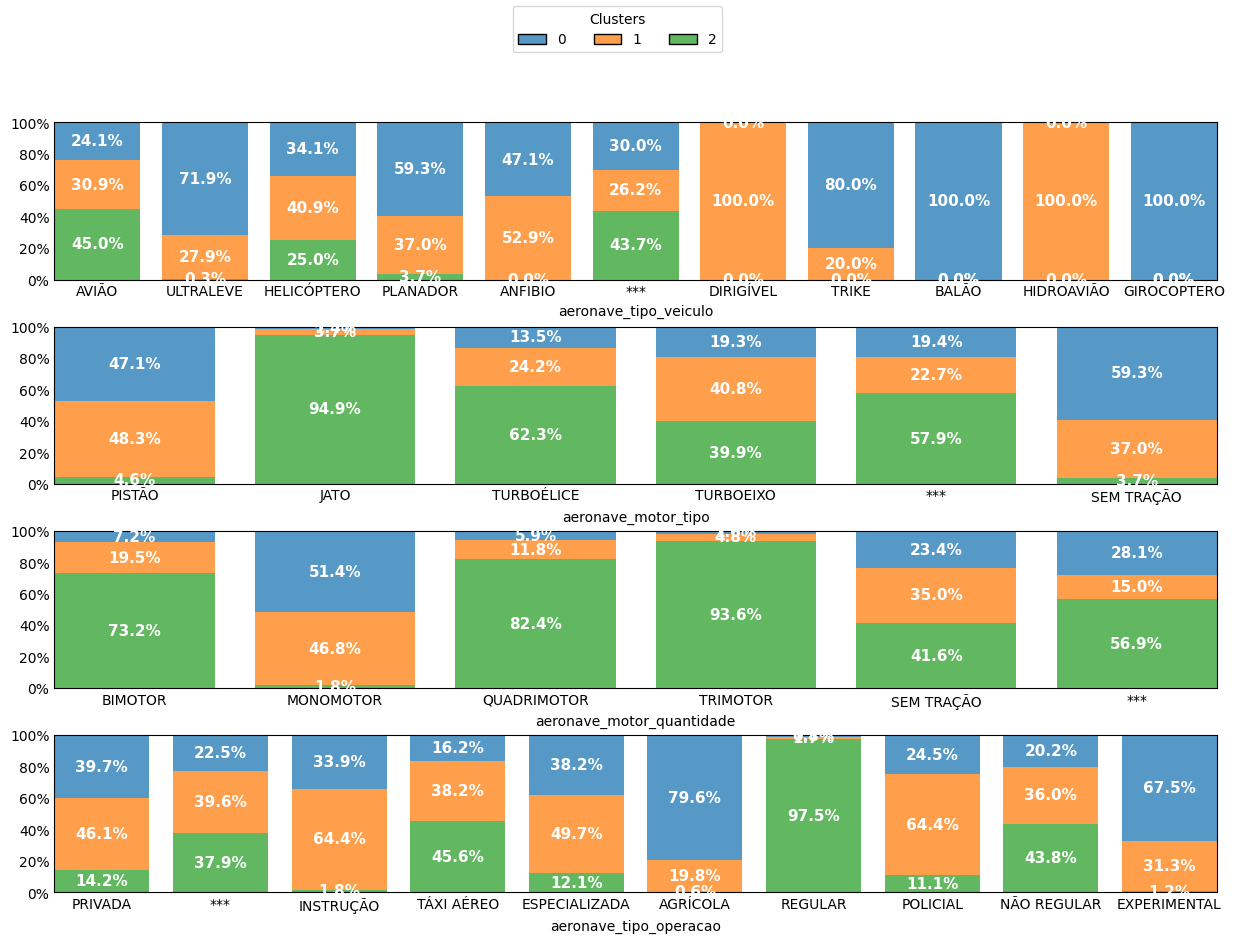

In [475]:
columns2 = [
 'aeronave_tipo_veiculo',
 'aeronave_motor_tipo',
 'aeronave_motor_quantidade',
 'aeronave_tipo_operacao',
]

from auxiliary_functions import plot_columns_percent_hue_cluster

plot_columns_percent_hue_cluster(
    dataframe=df_acidentes_aero,
    columns=columns2,
    rows_cols=(4, 1),
    figsize=(15, 10),
    column_cluster="cluster",      
)

Análise dos Clusters:
- Cluster_0
    - Acidente
    - Dano Leve
    - Alta saída da pista
    - Média nos quatro períodos
    - Ultra-leve
    - Planador
    - Trike
    - Balão
    - Girocoptero
    - Sem tração
    - Monomotor
    - Agrícola
    - Experimental

- Cluster_1
    - Incidente grave
    - Dano leve
    - Média saída da pista
    - Madrugada e manhã
    - Anfíbio
    - Dirigível
    - Hidroavião
    - Pistão
    - Sem tração
    - Instrução
    - Especializada
    - Policial

- Cluster_2
    - Incidente
    - Dano alto
    - Baixa saída da pista
    - Período da tarde
    - Avião
    - Jato
    - Turboélice
    - Bimotor
    - Quadrimotor
    - Trimotor
    - Regular


In [476]:
pipeline

Pipeline(steps=[('pca', PCA(n_components=2, random_state=42)),
                ('clustering',
                 KMeans(n_clusters=3, n_init=10, random_state=42))])

In [477]:
pipeline[:-1]

Pipeline(steps=[('pca', PCA(n_components=2, random_state=42))])

In [478]:
pipeline[:-1].get_feature_names_out()

array(['pca0', 'pca1'], dtype=object)

In [479]:
df_pca = pd.DataFrame(
    pipeline[:-1].fit_transform(df_acidentes_aero_trans),
    columns=pipeline[:-1].get_feature_names_out()
)

df_pca.head()

,pca0,pca1
0,-0.149105,0.194507
1,0.400555,0.099601
2,-0.876467,-0.234795
3,0.532844,0.241719
4,-0.516592,-0.076653


In [480]:
centroids = pipeline["clustering"].cluster_centers_
centroids

array([[ 1.29248557, -0.51062218],
       [ 0.32039829,  0.65983288],
       [-1.1121109 , -0.16985153]])

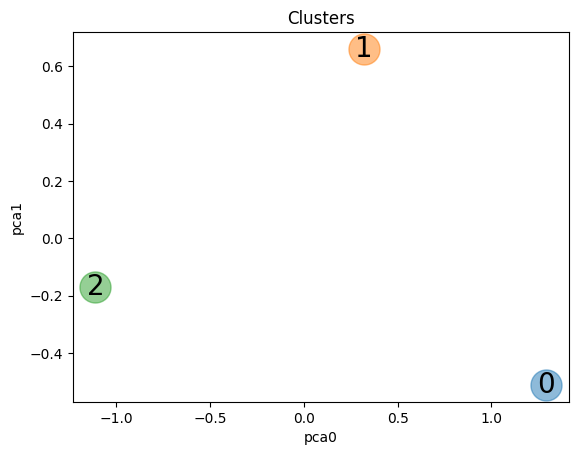

In [481]:
from auxiliary_functions import plot_clusters_2D

plot_clusters_2D(
    dataframe=df_pca,
    columns=df_pca.columns,
    n_colors=3,
    centroids=centroids
)

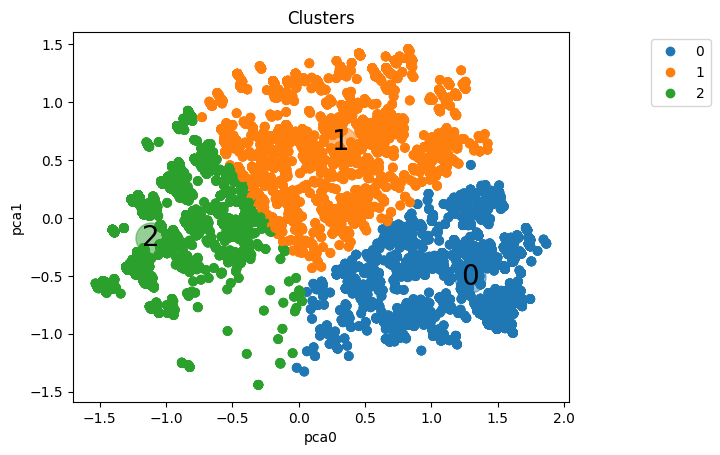

In [482]:
plot_clusters_2D(
    dataframe=df_pca,
    columns=df_pca.columns,
    n_colors=3,
    centroids=centroids,
    show_points=True,
    column_clusters=df_clustered["cluster"]
)

In [483]:
df_clustered = pd.concat([df_acidentes_aero, df_clustered], axis=1)

In [484]:
df_clustered.head()

,ocorrencia_classificacao,ocorrencia_saida_pista,aeronave_tipo_veiculo,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_tipo_operacao,aeronave_nivel_dano,periodo,ocorrencia_latitude,ocorrencia_longitude,cluster,one-hot__ocorrencia_classificacao_ACIDENTE,one-hot__ocorrencia_classificacao_INCIDENTE,one-hot__ocorrencia_classificacao_INCIDENTE GRAVE,one-hot__ocorrencia_saida_pista_NÃO,one-hot__ocorrencia_saida_pista_SIM,one-hot__aeronave_tipo_veiculo_***,one-hot__aeronave_tipo_veiculo_ANFÍBIO,one-hot__aeronave_tipo_veiculo_AVIÃO,one-hot__aeronave_tipo_veiculo_BALÃO,one-hot__aeronave_tipo_veiculo_DIRIGÍVEL,one-hot__aeronave_tipo_veiculo_GIROCÓPTERO,one-hot__aeronave_tipo_veiculo_HELICÓPTERO,one-hot__aeronave_tipo_veiculo_HIDROAVIÃO,one-hot__aeronave_tipo_veiculo_PLANADOR,one-hot__aeronave_tipo_veiculo_TRIKE,one-hot__aeronave_tipo_veiculo_ULTRALEVE,one-hot__aeronave_motor_tipo_***,one-hot__aeronave_motor_tipo_JATO,one-hot__aeronave_motor_tipo_PISTÃO,one-hot__aeronave_motor_tipo_SEM TRAÇÃO,one-hot__aeronave_motor_tipo_TURBOEIXO,one-hot__aeronave_motor_tipo_TURBOÉLICE,one-hot__aeronave_motor_quantidade_***,one-hot__aeronave_motor_quantidade_BIMOTOR,one-hot__aeronave_motor_quantidade_MONOMOTOR,one-hot__aeronave_motor_quantidade_QUADRIMOTOR,one-hot__aeronave_motor_quantidade_SEM TRAÇÃO,one-hot__aeronave_motor_quantidade_TRIMOTOR,one-hot__aeronave_tipo_operacao_***,one-hot__aeronave_tipo_operacao_AGRÍCOLA,one-hot__aeronave_tipo_operacao_ESPECIALIZADA,one-hot__aeronave_tipo_operacao_EXPERIMENTAL,one-hot__aeronave_tipo_operacao_INSTRUÇÃO,one-hot__aeronave_tipo_operacao_NÃO REGULAR,one-hot__aeronave_tipo_operacao_POLICIAL,one-hot__aeronave_tipo_operacao_PRIVADA,one-hot__aeronave_tipo_operacao_REGULAR,one-hot__aeronave_tipo_operacao_TÁXI AÉREO,one-hot__aeronave_nivel_dano_***,one-hot__aeronave_nivel_dano_DESTRUÍDA,one-hot__aeronave_nivel_dano_LEVE,one-hot__aeronave_nivel_dano_NENHUM,one-hot__aeronave_nivel_dano_SUBSTANCIAL,one-hot__periodo_00:00 às 06:00,one-hot__periodo_06:00 às 12:00,one-hot__periodo_12:00 às 18:00,one-hot__periodo_18:00 às 00:00,minmax__ocorrencia_latitude,minmax__ocorrencia_longitude,cluster
0,INCIDENTE,NÃO,AVIÃO,PISTÃO,BIMOTOR,PRIVADA,***,00:00 às 06:00,0.0,0.0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.528177,0.537901,1
1,INCIDENTE,NÃO,AVIÃO,PISTÃO,MONOMOTOR,PRIVADA,NENHUM,18:00 às 00:00,0.0,0.0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.528177,0.537901,1
2,INCIDENTE,NÃO,AVIÃO,JATO,BIMOTOR,***,***,18:00 às 00:00,0.0,0.0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.528177,0.537901,2
3,INCIDENTE,NÃO,AVIÃO,PISTÃO,MONOMOTOR,INSTRUÇÃO,***,00:00 às 06:00,0.0,0.0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.528177,0.537901,1
4,INCIDENTE,NÃO,AVIÃO,PISTÃO,BIMOTOR,TÁXI AÉREO,NENHUM,18:00 às 00:00,0.0,0.0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.528177,0.537901,2


In [485]:
df_clustered.to_csv("arquivos_tratados/df_acidentes_aero_clustered.csv", index=False)